Kartik Chaudhari 

In [ ]:
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2022-11-09 12:13:00--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2022-11-09 12:13:00--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip’

bluebook-for-bulldo 100%[===================>]  68.74M   118MB/s    in 0.6s    

2022-11-09 12:13:02 (118

In [ ]:
!ls

bluebook-for-bulldozers  bluebook-for-bulldozers.zip  __MACOSX	sample_data


In [ ]:
# !wget https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip # download files from Dropbox as zip

# import os
# import zipfile

# local_zip = 'dog-breed-identification.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('Dog Vision') # unzip the files into a file called "Dog Vision"
# zip_ref.close()

# 🚜 Predicting the sales price of bulldozers using machine learning.

## 1. Problem defination
> How well can we predict the future selling price of a bulldozer, given its characteristics and previous examples of how similar bulldozers have been soled for?

## 2. Data
> The data is downloaded from kaggle bluebook for bulldozers competition.

There are 3 main datasets:
* Train.csv is the training dataset, which contaions data through the end of 2011.

* Valid.csv is the validation set, which contains data from Jan 1 , 2012 - April 30, 2012. 

* Test.csv contains data from May 1, 2012 - Nov 2012

## 3. Evaluation
> The evaluation metric is the RSMLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
 > Read Data Dictionar.xlsx for details about each column.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Importing training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

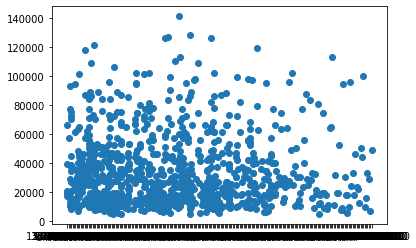

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

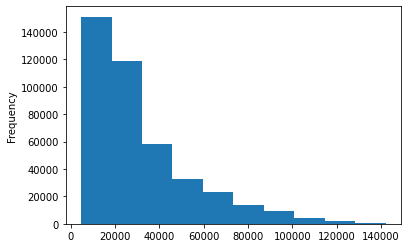

In [ ]:
df.SalePrice.plot.hist()

### Parsing dates
When we work with time series data, we want to enrich the time & date component as much as possible.

In [ ]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', parse_dates=['saledate'])

In [ ]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

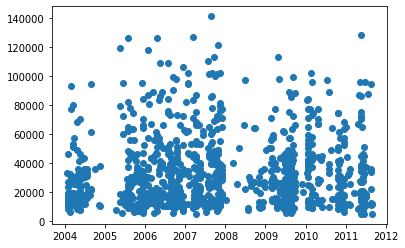

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

### Sort DataFrame by salesdate
> when working with time series data, it is good idea to sort data according to date.

In [ ]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original DataFrame

In [ ]:
df_temp = df.copy()

### Add datetime parameters for `saledate` column

In [ ]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [ ]:
df_temp.drop('saledate', axis=1, inplace=True)

## 5. Modelling
> We've done enough EDA (we could always do more) but let's do some model driven EDA.

In [ ]:
# Won't work as all of the data is not numeric.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(df.drop('SalePrice', axis=1), df['SalePrice'])

### Convert strings to categories
> One way we can turn all our data into numbers is by converting them into pandas categories

In [ ]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [ ]:
# Find the columns which contains string
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_temp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [ ]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [ ]:
# Hnadeling missing data
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving preprocessed data

In [ ]:
# Export current temp dataFrame
df_temp.to_csv('bluebook-for-bulldozers/train_temp.csv', index=False)

In [ ]:
# Import preprocessed data
df_temp = pd.read_csv('bluebook-for-bulldozers/train_temp.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Filling missing values

### Fill numerical missing values first

In [ ]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

In [ ]:
df_train = df_temp[df_temp.saleYear!=2012]
df_valid = df_temp[df_temp.saleYear==2012]
df_train.to_csv('bluebook-for-bulldozers/Train_conv.csv', index=False)
df_valid.to_csv('bluebook-for-bulldozers/Valid_conv.csv', index=False)

In [ ]:
df_train = pd.read_csv('bluebook-for-bulldozers/Train_conv.csv')
df_valid = pd.read_csv('bluebook-for-bulldozers/Valid_conv.csv')

In [ ]:
df_train.shape, df_valid.shape

((401125, 57), (11573, 57))

In [ ]:
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
for label, content in df_valid.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
# Check for which numeric columns have missing values
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_train[label+'_is_missing'] = pd.isnull(content)
      df_train[label] = content.fillna(content.median())

In [ ]:
for label, content in df_valid.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_valid[label+'_is_missing'] = pd.isnull(content)
      df_valid[label] = content.fillna(content.median())

In [ ]:
# df_valid['auctioneerID_is_missing'] = False
df_valid.insert(loc=57, column='auctioneerID_is_missing', value=False)

In [ ]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [ ]:
df_valid.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,NaN,D65E12,...,None or Unspecified,NaN,NaN,2012,1,1,6,1,False,False
1,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,Low,12HNA,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
2,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,Low,590SUPER LII,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
3,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,Medium,120C,...,NaN,NaN,NaN,2012,1,4,2,4,False,False
4,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,Medium,160CLC,...,NaN,NaN,NaN,2012,1,4,2,4,False,False


### Demonstrate how median is more robust than mean

In [ ]:
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [ ]:
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

### Filling and turning categorical varibles into numbers

In [ ]:
# check for columns which are not numeric
for label, content in df_train.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# check for columns which are not numeric
for label, content in df_valid.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# turn categorical varibles into numbers and fill missing values
for label, content in df_train.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column to indiate whether sample had missing values
    df_train[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers and add +1
    df_train[label] = pd.Categorical(content).codes + 1

In [ ]:
# turn categorical varibles into numbers and fill missing values
for label, content in df_valid.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column to indiate whether sample had missing values
    df_valid[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers and add +1
    df_valid[label] = pd.Categorical(content).codes + 1

In [ ]:
df_train.shape, df_valid.shape

((401125, 103), (11573, 103))

In [ ]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop('SalePrice', axis=1),  df_valid.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
%%time
# Fitting the model with training data
model = RandomForestRegressor(n_jobs=-1, random_state=42, verbose=True)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min


CPU times: user 15min 19s, sys: 1.99 s, total: 15min 21s
Wall time: 7min 50s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.8min finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=True)

In [ ]:
model.score(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   10.8s finished


0.9875207696134494

In [ ]:
model.score(X_valid, y_valid)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


0.4887595706302311

### Building an evaluation function

In [ ]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
  """
  Calcualte root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate models on few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  valid_preds = model.predict(X_valid)
  scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, valid_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, valid_preds),
             'Training R^2': r2_score(y_train, train_preds),
             'Valid R^2': r2_score(y_valid, valid_preds)}
  return scores

## Testing our model on a subset of data (to tune the hyperparameters)

In [ ]:
# Change max_samples values
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=9999, verbose=True)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s


CPU times: user 31.3 s, sys: 191 ms, total: 31.5 s
Wall time: 18 s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished


RandomForestRegressor(max_samples=9999, n_jobs=-1, random_state=42,
                      verbose=True)

In [ ]:
scores = show_scores(model)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
scores

{'Training MAE': 5564.697179283265,
 'Valid MAE': 9792.947754255594,
 'Training RMSLE': 0.2578801536251848,
 'Valid RMSLE': 0.39013952069102786,
 'Training R^2': 0.860519459212111,
 'Valid R^2': 0.6618616221282357}

In [ ]:
df_scores = pd.DataFrame(data=scores, index=[0])
df_scores

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
0,5564.697179,9792.947754,0.25788,0.39014,0.860519,0.661862


## HyperParameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10, 500, 20),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantitate the RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42), 
                              param_distributions=rf_grid,
                              n_iter=50,
                              cv=5,
                              verbose=7)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=4, n_estimators=310;, score=0.471 total time=  26.4s
[CV 2/5] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=4, n_estimators=310;, score=0.722 total time=  24.7s
[CV 3/5] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=4, n_estimators=310;, score=0.754 total time=  23.5s
[CV 4/5] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=4, n_estimators=310;, score=0.776 total time=  25.8s
[CV 5/5] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=4, n_estimators=310;, score=0.753 total time=  24.4s
[CV 1/5] END max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=17, min_samples_split=14, n_estimators=70;, score=0.412 total time=   3.9s
[CV 2/

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490])},
                   verbose=7)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 430,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
# Evaluate the Random model
scores = show_scores(rs_model)

In [ ]:
scores

{'Training MAE': 5749.526695656603,
 'Valid MAE': 10256.62264490065,
 'Training RMSLE': 0.26468340451184047,
 'Valid RMSLE': 0.39670531379889407,
 'Training R^2': 0.8534138365917965,
 'Valid R^2': 0.6559376667999028}

In [ ]:
### Train the model with the best hyperparameters
%%time
ideal_model = RandomForestRegressor(n_jobs=-1,
                                    max_features= 'auto',
                                    min_samples_leaf= 1,
                                    min_samples_split= 14,
                                    n_estimators= 40,
                                    verbose=True,
                                    random_state=42)

# n_jobs=-1,
# max_features= 'auto',
# min_samples_leaf= 3,
# min_samples_split= 4,
# n_estimators= 90,
# verbose=True,
# random_state=42

# n_jobs=-1,
# n_estimators=40,
# min_samples_leaf=1,
# min_samples_split=14,
# max_features=0.5,
# verbose=True,
# random_state=42
ideal_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


CPU times: user 5min 31s, sys: 195 ms, total: 5min 31s
Wall time: 2min 49s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.8min finished


RandomForestRegressor(min_samples_split=14, n_estimators=40, n_jobs=-1,
                      random_state=42, verbose=True)

In [ ]:
ideal_model.score(X_train, y_train)
# 0.9707184169211437

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    2.4s finished


0.9611809237962059

In [ ]:
ideal_model.score(X_valid, y_valid)
# 0.49689713892212817

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


0.4958194889892842

In [ ]:
scores = show_scores(ideal_model)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


In [ ]:
scores
# {'Training MAE': 2342.060495780036,
#  'Training RMSLE': 0.12181324475105637,
#  'Training R^2': 0.9707184169211437,
#  'Valid MAE': 10943.13791287654,
#  'Valid RMSLE': 0.4898288887031708,
#  'Valid R^2': 0.4971983336855669}

{'Training MAE': 2833.957627479536,
 'Valid MAE': 10985.442285484649,
 'Training RMSLE': 0.13991434314751172,
 'Valid RMSLE': 0.48914879251147614,
 'Training R^2': 0.9611809237962059,
 'Valid R^2': 0.4958194889892842}

### Make predictions on test data

In [ ]:
# Import the test data
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv', parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
def preprocess_data(df):
  """
  Performs transformations on df and returns transformed df.
  """
  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear
  df.drop('saledate', axis=1, inplace=True)

  # Fill the numeric rows with median, categorical data into numbers
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+'_is_missing'] = pd.isnull(content)
        df[label] = content.fillna(content.median())
      
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      df[label+'_is_missing'] = pd.isnull(content)
      df[label] = pd.Categorical(content).codes+1

  return df

In [ ]:
# process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
# We can find the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
df_test.insert(loc=56, column='auctioneerID_is_missing', value=False)

In [ ]:
test_preds = ideal_model.predict(df_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


In [ ]:
len(test_preds)

12457

In [ ]:
# Format predictions into the format kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test.SalesID
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,21903.508626
1,1227844,21772.267763
2,1227847,49217.689768
3,1227848,81614.297028
4,1227863,59900.820242


## Feature importance
> Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variables** (SalesPrice in this case).

In [ ]:
ideal_model.feature_importances_

array([4.69742164e-02, 1.21756224e-02, 3.28206447e-02, 1.91821415e-04,
       3.12549155e-03, 2.70526742e-01, 2.50027577e-03, 8.43621743e-04,
       1.99772329e-02, 8.10928500e-02, 5.28863842e-02, 4.29368684e-03,
       3.50245188e-03, 2.35522299e-01, 3.99581498e-02, 6.17186343e-03,
       1.81228308e-04, 2.29814760e-04, 1.75364587e-03, 8.26475972e-03,
       3.05132804e-04, 3.06971264e-05, 4.63643854e-04, 1.54449341e-04,
       1.61055671e-03, 2.34875755e-05, 4.23159465e-04, 6.14417712e-03,
       5.18267029e-04, 4.43919952e-04, 3.35706166e-03, 1.96243964e-03,
       2.08127313e-03, 5.59957035e-03, 1.82193673e-04, 1.44861683e-03,
       7.00543326e-04, 1.79065994e-02, 1.10664598e-05, 3.17601824e-06,
       1.63665177e-04, 8.70101771e-04, 9.83950026e-04, 5.50473585e-04,
       1.70484674e-04, 3.56937682e-04, 3.25653039e-04, 1.40734671e-03,
       8.08311024e-04, 1.16908514e-04, 1.78468076e-04, 7.77193838e-02,
       1.76251165e-03, 5.90059175e-03, 2.79566378e-03, 1.20326817e-02,
      

In [ ]:
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({'Features': columns,
                      'Feature_Importances': importances})
        .sort_values('Feature_Importances', ascending=False)
        .reset_index(drop=True))
  # Plot the dataframe
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.barh(df['Features'][:n], df['Feature_Importances'][:20])
  ax.set_ylabel('Features')
  ax.set_xlabel('Feature importance')
  ax.invert_yaxis()

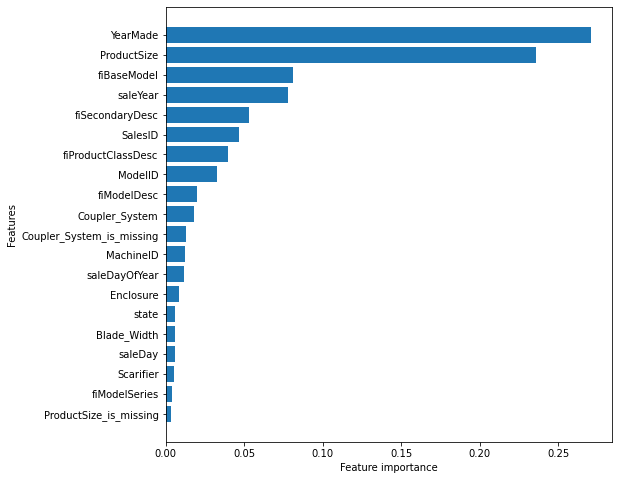

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# Trying SGD
> SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(random_state=42, verbose=True)
sgd_model.fit(X_train, y_train)

-- Epoch 1
Norm: 656397645401354.25, NNZs: 96, Bias: 5563549233.241773, T: 401125, Avg. loss: 2851057624217738322854285794642824974565376.000000
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 1514426932965435.50, NNZs: 96, Bias: -9039650508.093117, T: 802250, Avg. loss: 1181149734692832559460232561305215943311360.000000
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 1088960644647026.62, NNZs: 96, Bias: -5172796017.863156, T: 1203375, Avg. loss: 903266318021783799200983331822558955700224.000000
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 1245275800590563.75, NNZs: 96, Bias: -28160397348.343014, T: 1604500, Avg. loss: 762763181187487236983698681453750022832128.000000
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 1264629391926590.50, NNZs: 96, Bias: -22164725849.798302, T: 2005625, Avg. loss: 670168780979943457963030119825070014595072.000000
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 1336133912617723.00, NNZs: 96, Bias: -102206104987.311401, T: 2406750, Av

SGDRegressor(random_state=42, verbose=True)

# Trying XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(n_jobs=-1,
                         objective='reg:squarederror',
                         n_splits=10,
                         n_repeaters=3,
                         gamma=5,
                         verbose=True, 
                         random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(gamma=5, n_jobs=-1, n_repeaters=3, n_splits=10,
             objective='reg:squarederror', random_state=42, verbose=True)

In [ ]:
xgb_model.score(X_valid, y_valid)

0.6143179967040104

In [ ]:
%%time

sgb_grid = {'objective':['reg:squarederror', 'reg:squaredlogerror'],
            'gamma':[0, 4, 8, 12],
            'eta':np.arange(0, 1, 10),
            'max_depth':[5, 8, 10, 12, 15],
            'max_child_weight':[3, 6, 9],
            'max_samples':[10000]}

r_xgb_model = RandomizedSearchCV(XGBRegressor(),
                                 n_jobs=-1,
                                 param_distributions=sgb_grid,
                                 cv=5,
                                 verbose=5,
                                 n_iter=5,
                                 random_state=42)
r_xgb_model.fit(X_train, y_train)

In [ ]:
r_xgb_model.best_params_